In [1]:
from PIL import Image
import os
import cv2
import pandas as pd

def calculate_image_stats(image_path):
    # Vérifier si le fichier est une image
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']
    if not any(image_path.lower().endswith(ext) for ext in image_extensions):
        print(f"Ignoré le fichier non pris en charge : {image_path}")
        return None

    # Charger l'image
    img = cv2.imread(image_path)

    if img is None:
        print(f"Erreur de lecture de l'image : {image_path}")
        return None

    # Obtenir les dimensions de l'image (hauteur et largeur)
    height, width, _ = img.shape

    # Obtenir le format à partir de l'extension du fichier
    img_format = os.path.splitext(image_path)[1]

    # Convertir l'image en niveaux de gris
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Calculer la luminosité moyenne
    mean_brightness = gray.mean()
    
    # Convertir l'image en espace de couleur HSV
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # Extraire la composante de teinte (Hue)
    hue = hsv_img[:, :, 0]
    # Calculer la teinte moyenne
    mean_hue = hue.mean()

    return height, width, img_format, mean_brightness, mean_hue



def create_dataframe(root_dir):
    data = []

    for root, dirs, files in os.walk(root_dir):
        for file in files:
            img_path = os.path.join(root, file)
            cell_type = os.path.basename(root)
            image_stats = calculate_image_stats(img_path)

            if image_stats:
                data.append([img_path, cell_type] + list(image_stats))

    df = pd.DataFrame(data, columns=['img_path', 'cell_type', 'height', 'width', 'format', 'mean_brightness', 'mean_hue'])
    return df

root_directory = "PBC_dataset_normal_DIB"
df = create_dataframe(root_directory)

# Afficher le DataFrame
df.head()



Ignoré le fichier non pris en charge : PBC_dataset_normal_DIB\description.txt


img_path cell_type  height  width  \
0  PBC_dataset_normal_DIB\basophil\BA_100102.jpg  basophil     363    360   
1  PBC_dataset_normal_DIB\basophil\BA_101381.jpg  basophil     363    360   
2  PBC_dataset_normal_DIB\basophil\BA_101611.jpg  basophil     363    360   
3  PBC_dataset_normal_DIB\basophil\BA_102039.jpg  basophil     363    360   
4  PBC_dataset_normal_DIB\basophil\BA_102750.jpg  basophil     363    360   

  format  mean_brightness   mean_hue  
0   .jpg       201.010843  29.093519  
1   .jpg       194.197834  33.976997  
2   .jpg       193.350826  63.051538  
3   .jpg       188.760063  80.754500  
4   .jpg       203.143595  37.852036

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17092 entries, 0 to 17091
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   img_path         17092 non-null  object 
 1   cell_type        17092 non-null  object 
 2   height           17092 non-null  int64  
 3   width            17092 non-null  int64  
 4   format           17092 non-null  object 
 5   mean_brightness  17092 non-null  float64
 6   mean_hue         17092 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 934.8+ KB


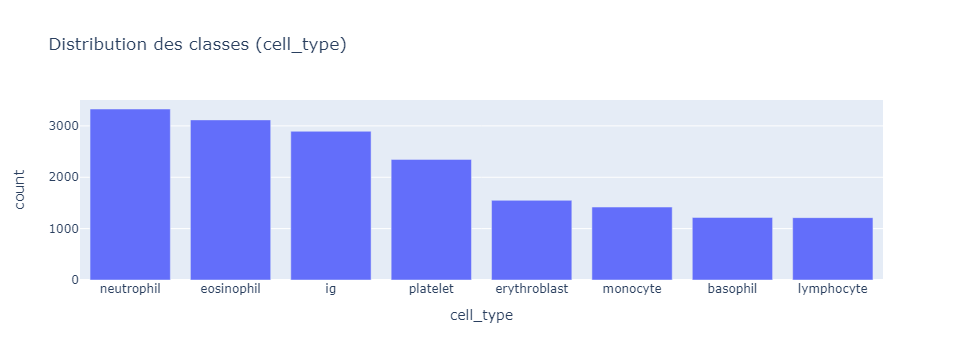

In [149]:
import plotly.express as px
class_counts = df['cell_type'].value_counts().reset_index()
class_counts.columns = ['cell_type', 'count']

# Créez un graphique à barres interactif de la distribution des classes avec le compte
fig = px.bar(class_counts, x='cell_type', y='count', title='Distribution des classes (cell_type)')

# Affichez le graphique interactif
fig.show()

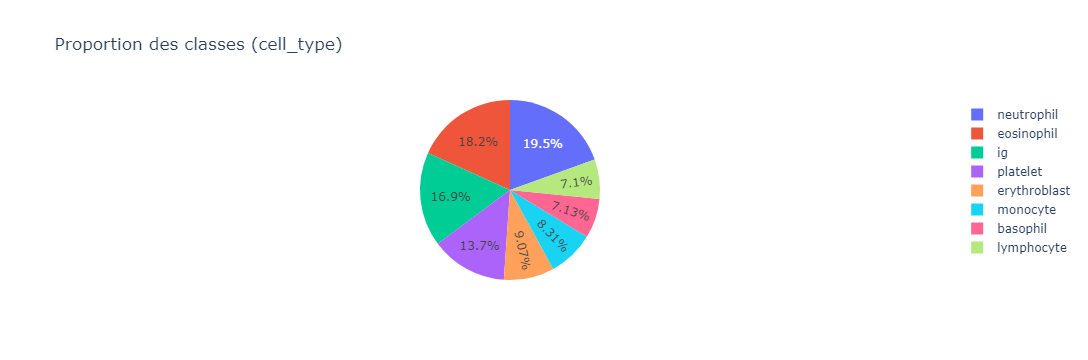

In [56]:
fig = px.pie(class_counts, names='cell_type', values='count', title='Proportion des classes (cell_type)')
fig.show()

In [150]:
print("Nombre d'occurences pour chaque valeur de 'width' :\n", df['width'].value_counts())
print("Nombre d'occurences pour chaque valeur de 'height' :\n", df['height'].value_counts())

Nombre d'occurences pour chaque valeur de 'width' :
 width
360    16839
366      250
362        1
359        1
361        1
Name: count, dtype: int64
Nombre d'occurences pour chaque valeur de 'height' :
 height
363    16639
369      250
360      201
361        2
Name: count, dtype: int64


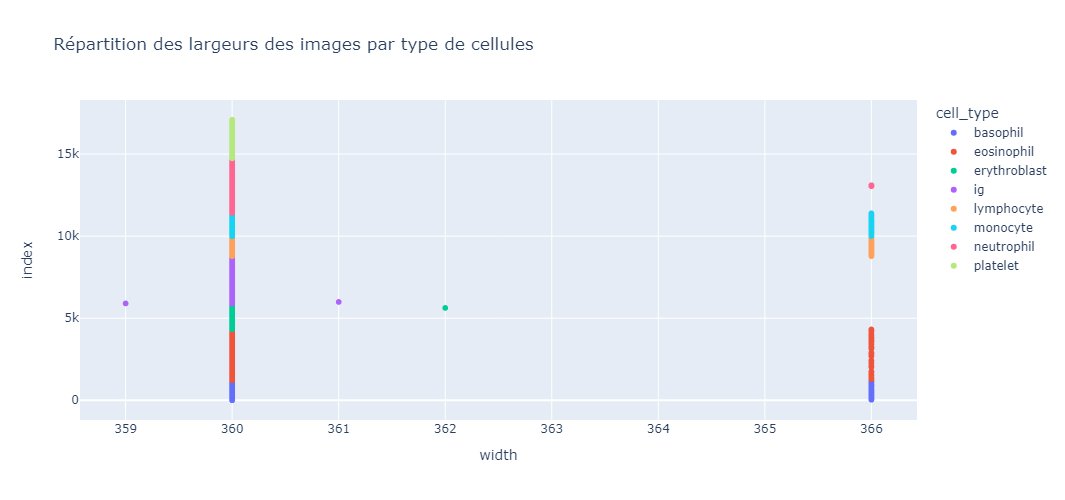

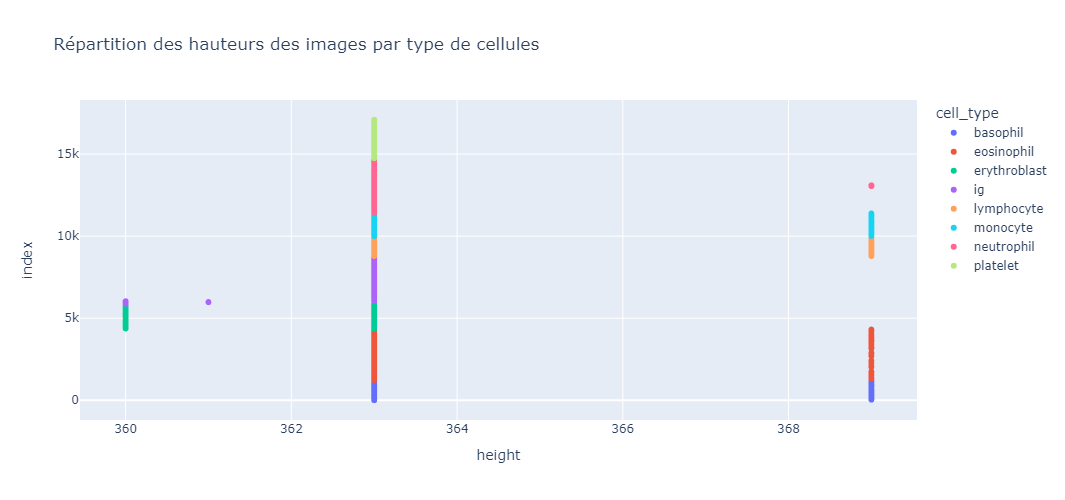

In [169]:
# Créer un scatter plot interactif pour la largeur (width) en différenciant par classe
fig_width = px.scatter(df, x='width', color='cell_type', title="Répartition des largeurs des images par type de cellules")

# Créer un scatter plot interactif pour la hauteur (height) en différenciant par classe
fig_height = px.scatter(df, x='height', color='cell_type', title="Répartition des hauteurs des images par type de cellules")
fig_width.update_layout(width=550, height=500)
fig_height.update_layout(width=550, height=500)
fig_width.show()
fig_height.show()

In [171]:
df.loc[5897]

img_path           PBC_dataset_normal_DIB\ig\IG_168188.jpg
cell_type                                               ig
height                                                 360
width                                                  359
format                                                .jpg
mean_brightness                                 194.698661
mean_hue                                        146.280393
Name: 5897, dtype: object

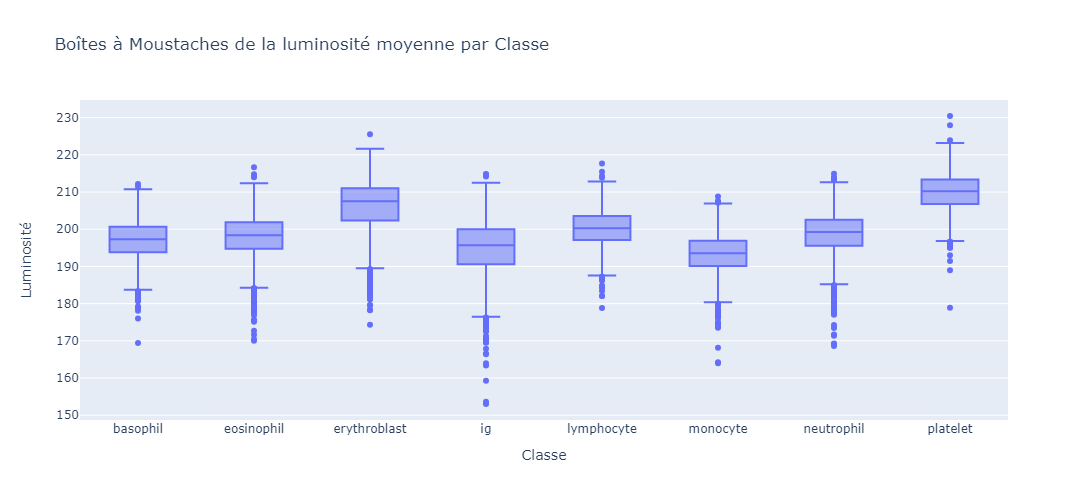

In [165]:
# Créez un graphique interactif de boîte (box plot) pour la luminosité en fonction de la classe (cell_type)
fig_box = px.box(df, x='cell_type', y='mean_brightness', title='Boîtes à Moustaches de la luminosité moyenne par Classe',
                labels={'mean_brightness': 'Luminosité', 'cell_type': 'Classe'},
                hover_data=['img_path'])
# Mettez à jour la taille du graphique
fig_box.update_layout(width=800, height=500)

# Affichez le graphique interactif de la boîte à moustaches
fig_box.show()


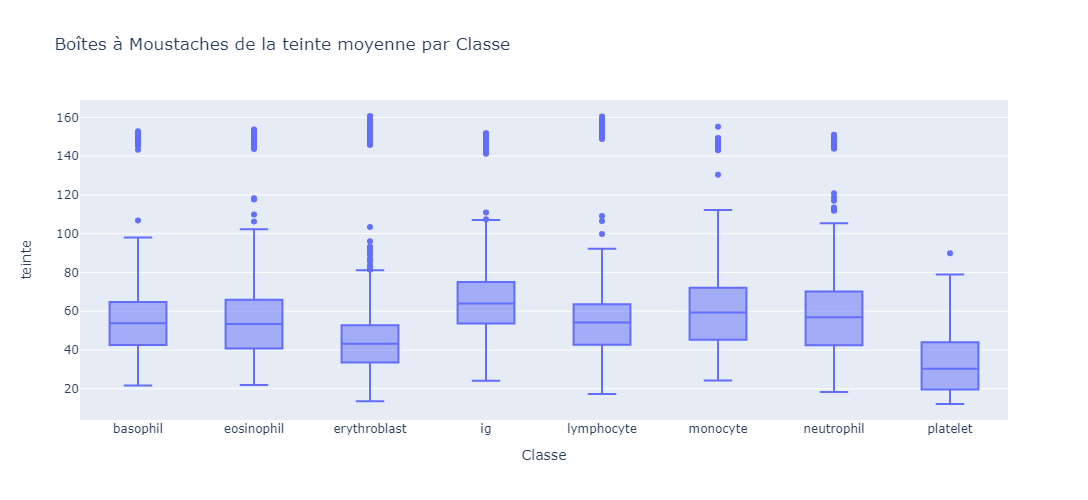

In [172]:
# Créez un graphique interactif de boîte (box plot) pour la teinte en fonction de la classe (cell_type)
fig_box = px.box(df, x='cell_type', y='mean_hue', title='Boîtes à Moustaches de la teinte moyenne par Classe',
                labels={'mean_hue': 'teinte', 'cell_type': 'Classe'},
                hover_data=['img_path'])
# Mettez à jour la taille du graphique
fig_box.update_layout(width=800, height=500)

# Affichez le graphique interactif de la boîte à moustaches
fig_box.show()
